In [1]:
import numpy as np #linear algebra
import pandas as pd #data processing,csv file I/o
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#data gathering
data=pd.read_csv('C:\\Users\\HP-DK0272TX\\OneDrive\\Desktop\\file\\Codingrad\\Car-details-v3.csv')
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [3]:
#pre process(cleaning)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [4]:
data.isnull().sum()#check null values

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [5]:
final_data = data[['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power',
       'seats']]

In [6]:
final_data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [7]:
#s=data.drop(['name','mileage','engine','max_power','torque','seats','owner'],axis='columns',inplace=True)#remove or del column
#now we are going to remove kmpl, cc, bhp

#removed kmpl
final_data['mileage'] = final_data['mileage'].apply(lambda x: x.split()[0] if type(x)==str else np.nan)

#removed cc
final_data['engine'] = final_data['engine'].apply(lambda x: x.split()[0] if type(x)==str else np.nan)

#removed bhp
final_data['max_power'] = final_data['max_power'].apply(lambda x: x.split()[0] if type(x)==str else np.nan)

In [8]:
final_data.head(3)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,5.0


In [9]:
final_data['current_year'] = 2020

In [10]:
final_data['no_years'] = final_data['current_year']-final_data['year']
final_data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,current_year,no_years
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,5.0,2020,6
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,2020,6
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,5.0,2020,14
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,5.0,2020,10
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,5.0,2020,13


In [11]:
final_data.drop(['year'], axis=1, inplace=True)

In [12]:
final_data.drop(['current_year'], axis=1, inplace=True)

In [13]:
final_data.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,no_years
0,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,5.0,6
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,6
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,5.0,14
3,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,5.0,10
4,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,5.0,13


In [14]:
final_data.isnull().sum()

selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
no_years           0
dtype: int64

In [15]:
# check missing values percentage in each column
final_data.isnull().mean().round(4).mul(100).sort_values(ascending=False).head()

mileage          2.72
engine           2.72
seats            2.72
max_power        2.65
selling_price    0.00
dtype: float64

In [16]:
final_data.dropna(inplace = True)


In [17]:
final_data.isnull().sum()

selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
no_years         0
dtype: int64

In [18]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7907 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   selling_price  7907 non-null   int64  
 1   km_driven      7907 non-null   int64  
 2   fuel           7907 non-null   object 
 3   seller_type    7907 non-null   object 
 4   transmission   7907 non-null   object 
 5   owner          7907 non-null   object 
 6   mileage        7907 non-null   object 
 7   engine         7907 non-null   object 
 8   max_power      7907 non-null   object 
 9   seats          7907 non-null   float64
 10  no_years       7907 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 741.3+ KB


In [19]:
final_data[final_data['max_power'].str.contains('bhp')]

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,no_years
4933,80000,100000,CNG,Individual,Manual,Second Owner,10.9,796,bhp,8.0,20


In [20]:
# we have one row containing only bhp with no value in it, lets drop it

final_data = final_data[final_data['max_power'].str.contains('bhp') == False]

In [21]:
# convert from object type to their respective types

final_data['mileage'] = final_data['mileage'].astype('float')
final_data['engine'] = final_data['engine'].astype('int64')
final_data['max_power'] = final_data['max_power'].astype('float')

In [22]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   selling_price  7906 non-null   int64  
 1   km_driven      7906 non-null   int64  
 2   fuel           7906 non-null   object 
 3   seller_type    7906 non-null   object 
 4   transmission   7906 non-null   object 
 5   owner          7906 non-null   object 
 6   mileage        7906 non-null   float64
 7   engine         7906 non-null   int64  
 8   max_power      7906 non-null   float64
 9   seats          7906 non-null   float64
 10  no_years       7906 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 741.2+ KB


In [23]:
final_data.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,no_years
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0,6
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,6
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0,14
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0,10
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0,13


In [24]:
final_data = pd.get_dummies(final_data, drop_first= True) #drop_first because of dummie variable trap

In [25]:
final_data.head()

,selling_price,km_driven,mileage,engine,max_power,seats,no_years,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,450000,145500,23.40,1248,74.00,5.0,6,1,0,0,1,0,1,0,0,0,0
1,370000,120000,21.14,1498,103.52,5.0,6,1,0,0,1,0,1,0,1,0,0
2,158000,140000,17.70,1497,78.00,5.0,14,0,0,1,1,0,1,0,0,0,1
3,225000,127000,23.00,1396,90.00,5.0,10,1,0,0,1,0,1,0,0,0,0
4,130000,120000,16.10,1298,88.20,5.0,13,0,0,1,1,0,1,0,0,0,0


In [26]:
# corr() - it tells us, how one feature is related to the other feature
final_data.corr()

,selling_price,km_driven,mileage,engine,max_power,seats,no_years,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
selling_price,1.000000,-0.222158,-0.126280,0.455682,0.749674,0.041617,-0.412302,0.204831,-0.035978,-0.195074,-0.386151,0.032779,-0.590269,-0.073601,-0.178786,0.116081,-0.115113
km_driven,-0.222158,1.000000,-0.172980,0.206031,-0.038159,0.227259,0.428548,0.271662,0.023095,-0.274460,0.202851,-0.083181,0.201186,0.089244,0.209913,-0.024168,0.148795
mileage,-0.126280,-0.172980,1.000000,-0.576408,-0.374621,-0.451700,-0.328544,0.060256,-0.013924,-0.074927,0.011862,-0.036248,0.178986,-0.072118,-0.101811,-0.015644,-0.097455
engine,0.455682,0.206031,-0.576408,1.000000,0.703975,0.611103,-0.018263,0.507383,-0.056681,-0.491189,-0.132215,0.038690,-0.283206,-0.006433,0.020809,0.013954,-0.004743
max_power,0.749674,-0.038159,-0.374621,0.703975,1.000000,0.191999,-0.226598,0.304787,-0.060175,-0.286090,-0.286493,0.026493,-0.541870,-0.037283,-0.085206,0.049734,-0.054249
seats,0.041617,0.227259,-0.451700,0.611103,0.191999,1.000000,0.007923,0.354764,-0.028949,-0.345399,0.081197,-0.028106,0.072722,0.007845,0.033751,-0.010921,0.005175
no_years,-0.412302,0.428548,-0.328544,-0.018263,-0.226598,0.007923,1.000000,-0.037536,0.059887,0.034351,0.243729,-0.100385,0.249002,0.205631,0.317328,-0.032661,0.271317
fuel_Diesel,0.204831,0.271662,0.060256,0.507383,0.304787,0.354764,-0.037536,1.000000,-0.072800,-0.978020,0.003567,-0.140763,0.025579,-0.009021,0.051721,-0.017362,-0.007567
fuel_LPG,-0.035978,0.023095,-0.013924,-0.056681,-0.060175,-0.028949,0.059887,-0.072800,1.000000,-0.059739,0.025092,-0.011697,0.025967,0.003946,0.013442,-0.001678,0.021268
fuel_Petrol,-0.195074,-0.274460,-0.074927,-0.491189,-0.286090,-0.345399,0.034351,-0.978020,-0.059739,1.000000,-0.012914,0.144956,-0.034257,0.008609,-0.055230,0.017957,0.006146


In [27]:
import seaborn as sns

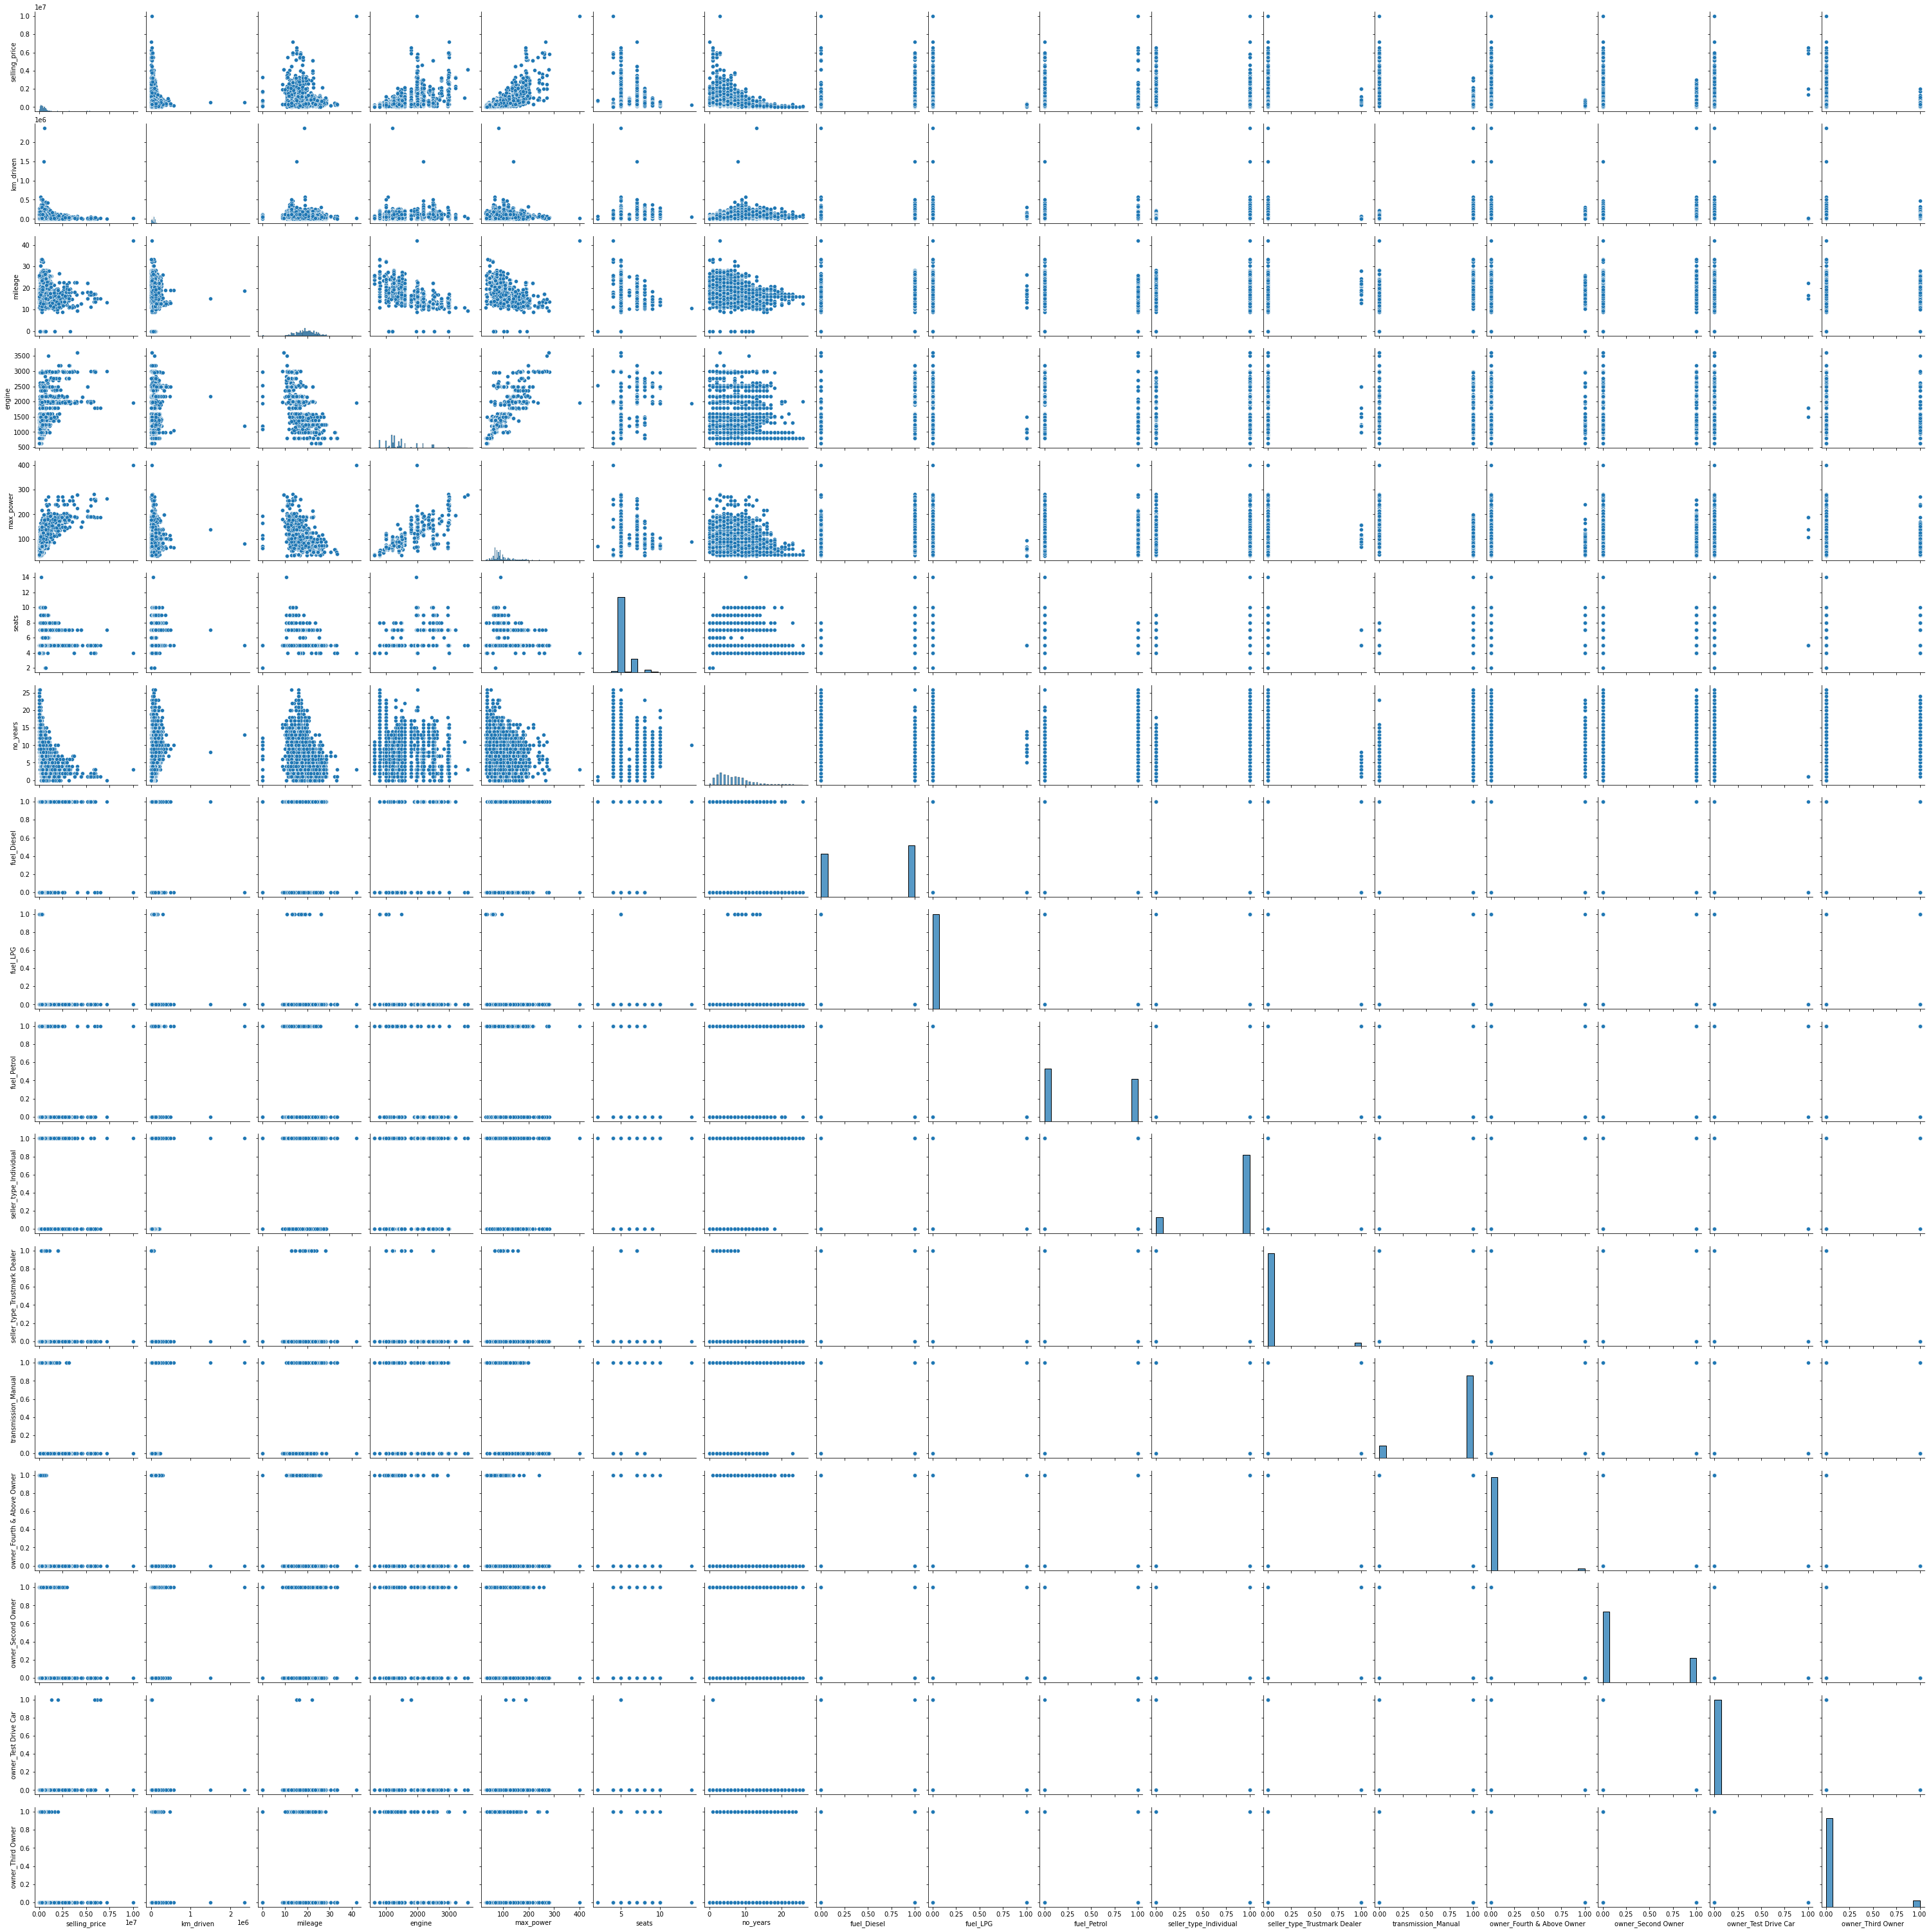

In [28]:
sns.pairplot(final_data)

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

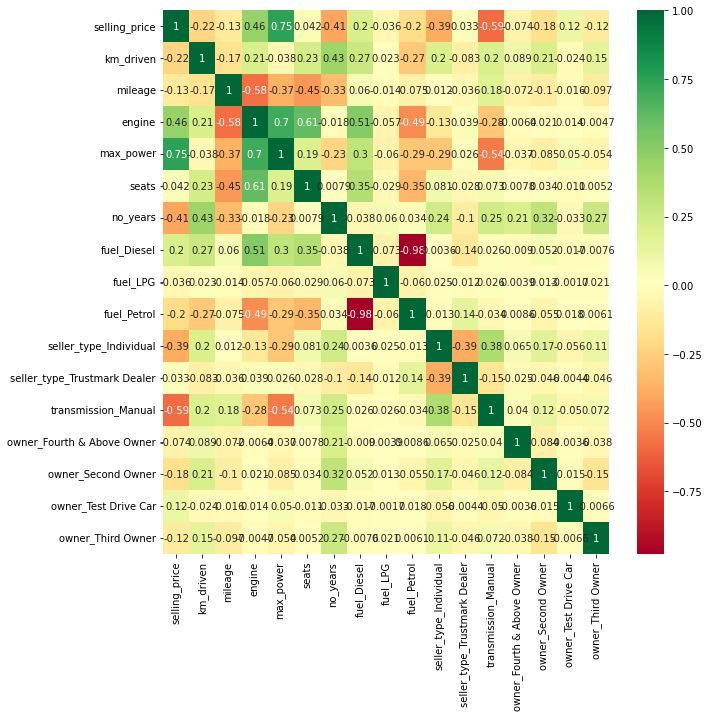

In [30]:
corrmat = final_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g = sns.heatmap(final_data[top_corr_features].corr(), annot=True, cmap="RdYlGn")

In [31]:
#independent and dependent features

X = final_data.iloc[:, 1:]
y = final_data.iloc[:, 0]

In [32]:
X.head()

,km_driven,mileage,engine,max_power,seats,no_years,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,145500,23.40,1248,74.00,5.0,6,1,0,0,1,0,1,0,0,0,0
1,120000,21.14,1498,103.52,5.0,6,1,0,0,1,0,1,0,1,0,0
2,140000,17.70,1497,78.00,5.0,14,0,0,1,1,0,1,0,0,0,1
3,127000,23.00,1396,90.00,5.0,10,1,0,0,1,0,1,0,0,0,0
4,120000,16.10,1298,88.20,5.0,13,0,0,1,1,0,1,0,0,0,0


In [33]:
y.head()

0    450000
1    370000
2    158000
3    225000
4    130000
Name: selling_price, dtype: int64

In [34]:
#feature importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [35]:
print(model.feature_importances_)

[4.52132301e-02 2.70574250e-02 9.25560066e-02 2.49791259e-01
 1.21118702e-02 1.53920769e-01 3.11619800e-02 5.37574275e-06
 2.06888277e-02 2.45375608e-02 1.36742665e-03 3.24871761e-01
 2.59196070e-04 9.20166887e-03 6.54764409e-03 7.07998715e-04]


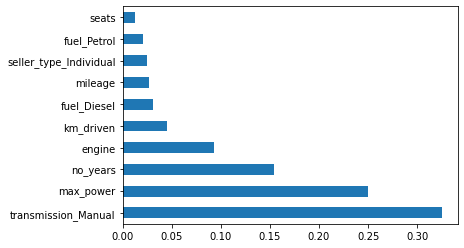

In [36]:
#plot graph of feature importance for better visualization
feat_importances = pd.Series(model.feature_importances_, index = X.columns)
feat_importances.nlargest(10).plot(kind = 'barh')
plt.show()

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [38]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()

In [39]:
#hyperparameters
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [40]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [41]:
#we are using randomized searchcv as it is pretty much fast
from sklearn.model_selection import RandomizedSearchCV

In [42]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [43]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [44]:
#applying my randomized searchCV
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [45]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [46]:
predictions = rf_random.predict(X_test)

In [47]:
predictions

array([2497712.55778889,  650000.        ,  635598.94538095, ...,
        811855.37205749,  467718.34993254,  476314.87722619])

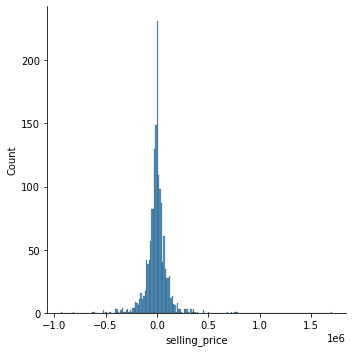

In [48]:
sns.displot(y_test-predictions)

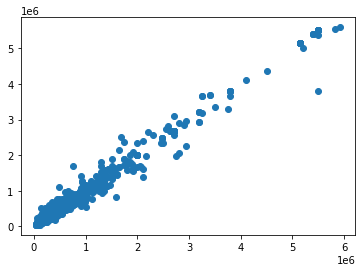

In [49]:
plt.scatter(y_test, predictions)

In [50]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 65301.7267673886
MSE: 13803634693.224134
RMSE: 117488.87050790868


In [51]:
from sklearn.metrics import r2_score
print('r2score: ', r2_score(y_test, predictions))

r2score:  0.9806569976998869


In [52]:
import pickle 
#open a file, where you want to store the data
file = open('random_forest_regression_model.pkl', 'wb')

#dump information to the file
pickle.dump(rf_random, file)